In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('ecg.csv')
ecg_data = data.values

In [8]:
ecg_data = ecg_data / np.max(ecg_data)

In [9]:
train_data = ecg_data[:int(0.8 * len(ecg_data))]
test_data = ecg_data[int(0.8 * len(ecg_data)):]

In [10]:
input_dim = train_data.shape[1]  # Number of features
encoding_dim = 32 

In [11]:
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)

In [12]:
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [13]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = autoencoder.fit(train_data, train_data, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1957 - mae: 0.4041 - val_loss: 0.0421 - val_mae: 0.1451
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 - mae: 0.0943 - val_loss: 0.0277 - val_mae: 0.0992
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175 - mae: 0.0806 - val_loss: 0.0250 - val_mae: 0.0944
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - mae: 0.0748 - val_loss: 0.0230 - val_mae: 0.0906
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 - mae: 0.0710 - val_loss: 0.0214 - val_mae: 0.0874
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mae: 0.0681 - val_loss: 0.0202 - val_mae: 0.0846
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 - mae: 0.0664 - val_loss: 0.0194 - val_mae: 0.0822
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0140 - mae: 0.0659 - val_loss: 0.0188 - val_mae: 0.0800
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

In [14]:
reconstructions = autoencoder.predict(test_data)
reconstruction_loss = tf.keras.losses.mse(test_data, reconstructions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [15]:
threshold = np.mean(reconstruction_loss) + 2 * np.std(reconstruction_loss)
print(f"Anomaly Detection Threshold: {threshold}")

Anomaly Detection Threshold: 0.019882208202034235


In [16]:
anomalies = reconstruction_loss > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Number of anomalies detected: 7


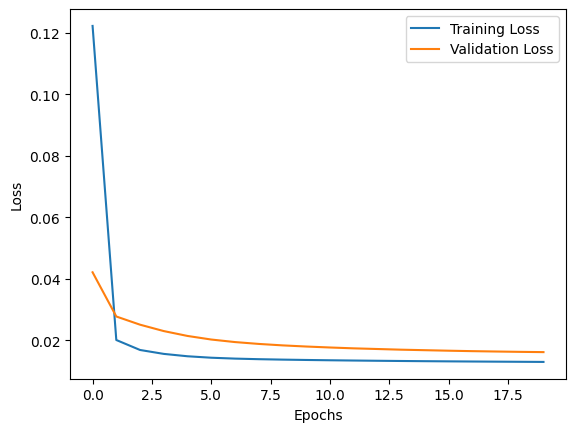

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()